<img src="images/digits.png">

### <font color=blue>Importing required libraries</font>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

### <font color=blue>Loading dataset</font>

In [3]:
digits = datasets.load_digits()
print(digits.images[0])
print(digits.images[0].shape)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(8, 8)


### <font color=blue>Visualizing input images</font>

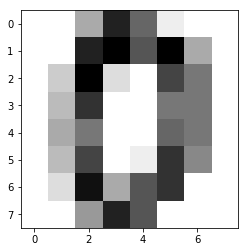

In [4]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

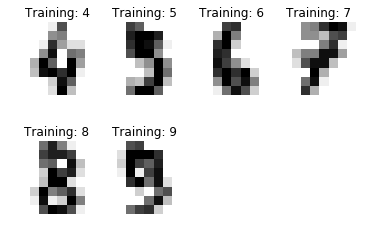

In [7]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[4:10]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

### <font color=blue>Making train test datasets</font>

In [11]:
1797//2

898

In [8]:
n_samples = len(digits.images)
print('number of images', n_samples)
data = digits.images.reshape((n_samples, -1))
print('train_matrix_shape', data.shape)

number of images 1797
train_matrix_shape (1797, 64)


In [12]:
train_data = data[:n_samples // 2]
train_label = digits.target[:n_samples // 2]
print(train_data.shape)
print(len(train_label))
train_label

(898, 64)
898


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5,
       4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6,
       4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 3, 1, 3,
       9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2,
       8, 2, 2, 5, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
       0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,

In [13]:
test_data = data[n_samples // 2:]
test_label = digits.target[n_samples // 2:]

### <font color=blue>Prediction</font>

In [14]:
classifier = svm.SVC(gamma=0.001)
classifier.fit(train_data, train_label)
predicted = classifier.predict(test_data)
expected = test_label

### <font color=blue>Measuring performance</font>

In [15]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

### <font color=blue>Visualizing predicted images</font>

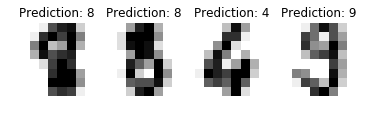

In [16]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()